# Wine Quality Clustering
## Final Project for DTSA-5510
Github - https://github.com/vibhu-shakelli/wine-quality/blob/main/wine_quality_clustering.ipynb

### Problem Description
Although I am not a big fan of wine, I do find it fascinating how complex the wine industry. When you consider how the complex chemical composition of wine, it becomes obvious how varying in quality wines are and the importance of wine Sommeliers. With this project I hope to use unsupervised machine learning to cluster wines into a quality metric from 0-10. 

I found the data source I have chosen for this project from UC Irvine's Machine Learning Repository. The file itself is readily available [here](https://archive.ics.uci.edu/dataset/186/wine+quality). The dataset contains 2 instances. There is an instance for red wine and an instance for white wine. I will be combining these files to complete my project. The features of the data are as follows: 
1. fixed acidity
1. volatile acidity
1. citric acid
1. residual sugar
1. chlorides
1. free sulfur dioxide
1. total sulfur dioxide
1. density
1. pH
1. sulphates
1. alcohol
1. quality

I will add a new feature to represent red and white wine to indicate the combined dataset. And I will drop the quality feature to train my model. After I have created my clusters, I will attempt to decode them into quality values to determine accuracy. 

Source Citation: 
Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

### Setup

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [2]:
red = pd.read_csv("winequality-red.csv", delimiter=';')
red = red.reindex(red.columns.union(["color"], sort=False), axis=1, fill_value=0) #encoding color red

white = pd.read_csv("winequality-white.csv", delimiter=';')
white = white.reindex(white.columns.union(["color"], sort=False), axis=1, fill_value=1) #encoding color white

df = pd.concat([red, white]) #combining the 2 datasets into 1 dataframe

### Exploratory Data Analysis (EDA)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


#### Analysis of Individual Features

##### Fixed acidity
Fixed acidity has a scewed right distribution with a min value of 3.8 and a max value of 15.9.

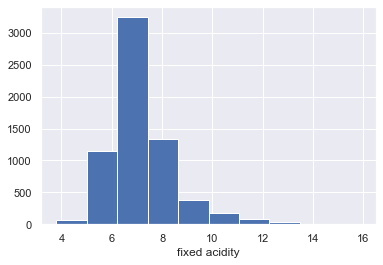

min: 3.8
max: 15.9


In [5]:
plt.hist(df['fixed acidity'])
plt.xlabel('fixed acidity')
plt.show()
print("min: "+ str(min(df['fixed acidity'])))
print("max: "+ str(max(df['fixed acidity'])))

##### Volatile acidity
Volatile acidity has a scewed right distribution with a min value of 0.8 and a max value of 1.58.

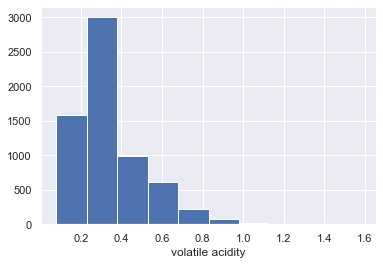

min: 0.08
max: 1.58


In [6]:
plt.hist(df['volatile acidity'])
plt.xlabel('volatile acidity')
plt.show()
print("min: "+ str(min(df['volatile acidity'])))
print("max: "+ str(max(df['volatile acidity'])))

##### Citric Acid
Citric Acid has a scewed right distribution with a min value of 0.0 and a max value of 1.66.

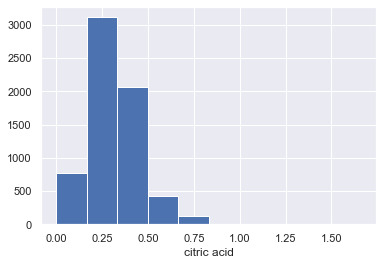

min: 0.0
max: 1.66


In [7]:
plt.hist(df['citric acid'])
plt.xlabel('citric acid')
plt.show()
print("min: "+ str(min(df['citric acid'])))
print("max: "+ str(max(df['citric acid'])))

##### Residual Sugar
Residual Sugar has a scewed right distribution with a min value of 0.6 and a max value of 65.8.

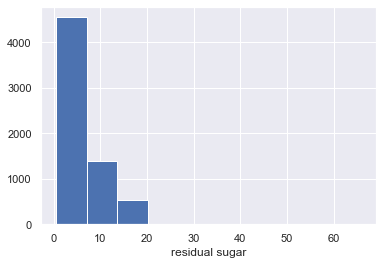

min: 0.6
max: 65.8


In [8]:
plt.hist(df['residual sugar'])
plt.xlabel('residual sugar')
plt.show()
print("min: "+ str(min(df['residual sugar'])))
print("max: "+ str(max(df['residual sugar'])))

##### Chlorides
Chlorides has a scewed right distribution with a min value of 0.009 and a max value of 0.611.

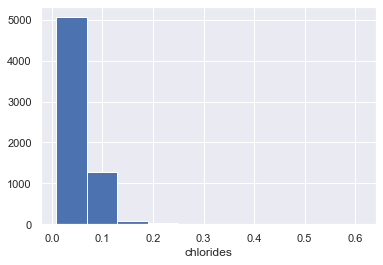

min: 0.009
max: 0.611


In [9]:
plt.hist(df['chlorides'])
plt.xlabel('chlorides')
plt.show()
print("min: "+ str(min(df['chlorides'])))
print("max: "+ str(max(df['chlorides'])))

##### Free Sulfur Dioxide
Free Sulfur Dioxide has a scewed right distribution with a min value of 1.0 and a max value of 289.0.

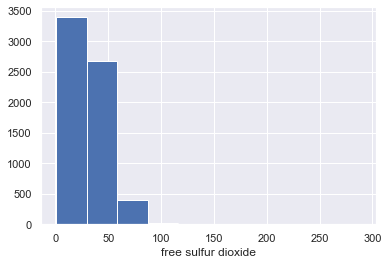

min: 1.0
max: 289.0


In [10]:
plt.hist(df['free sulfur dioxide'])
plt.xlabel('free sulfur dioxide')
plt.show()
print("min: "+ str(min(df['free sulfur dioxide'])))
print("max: "+ str(max(df['free sulfur dioxide'])))

##### Total Sulfur Dioxide
Total Sulfur Dioxide has a scewed right distribution with a min value of 6.0 and a max value of 440.0.

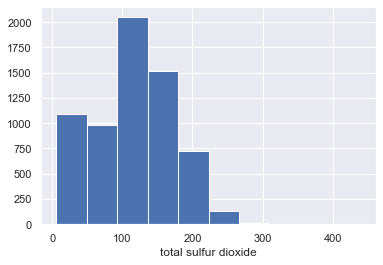

min: 6.0
max: 440.0


In [11]:
plt.hist(df['total sulfur dioxide'])
plt.xlabel('total sulfur dioxide')
plt.show()
print("min: "+ str(min(df['total sulfur dioxide'])))
print("max: "+ str(max(df['total sulfur dioxide'])))

##### Density
Density has a normal distribution with a min value of 0.98711 and a max value of 1.03898.

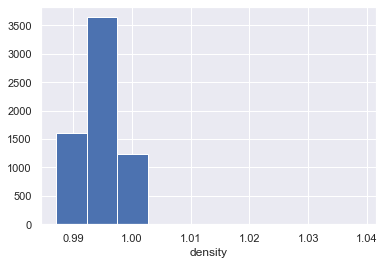

min: 0.98711
max: 1.03898


In [12]:
plt.hist(df['density'])
plt.xlabel('density')
plt.show()
print("min: "+ str(min(df['density'])))
print("max: "+ str(max(df['density'])))

##### pH
pH has a normal distribution with a min value of 2.72 and a max value of 4.01.

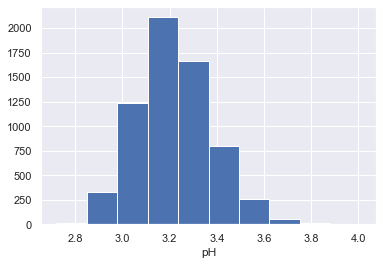

min: 2.72
max: 4.01


In [13]:
plt.hist(df['pH'])
plt.xlabel('pH')
plt.show()
print("min: "+ str(min(df['pH'])))
print("max: "+ str(max(df['pH'])))

##### Sulphates
Sulphates has a right scewed distribution with a min value of 0.22 and a max value of 2.0.

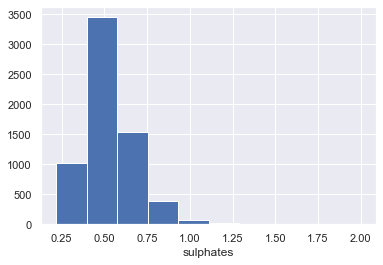

min: 0.22
max: 2.0


In [14]:
plt.hist(df['sulphates'])
plt.xlabel('sulphates')
plt.show()
print("min: "+ str(min(df['sulphates'])))
print("max: "+ str(max(df['sulphates'])))

##### Alcohol
Alcohol has a right scewed distribution with a min value of 8.0 and a max value of 14.9.

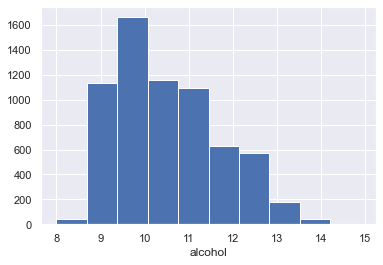

min: 8.0
max: 14.9


In [15]:
plt.hist(df['alcohol'])
plt.xlabel('alcohol')
plt.show()
print("min: "+ str(min(df['alcohol'])))
print("max: "+ str(max(df['alcohol'])))

#### Color
There are 2 colors represented, red and white. Red wine is denoted with a 0, while white wine is 1. 

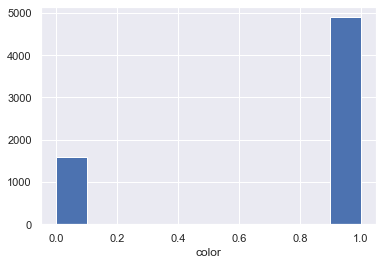

red: 1599
white: 4898


In [16]:
plt.hist(df['color'])
plt.xlabel('color')
plt.show()
print("red: " + str(len(df['color'])-sum(df['color'])))
print("white: " + str(sum(df['color'])))

##### Quality
Quality has a right scewed distribution with a min value of 3 and a max value of 9. The mean is 5.82. There are 1599 red wines, and 4898 red wines. 

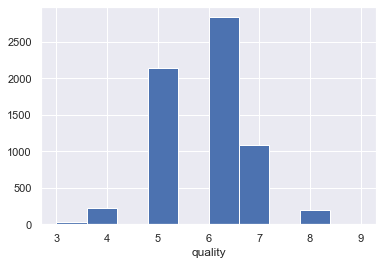

min: 3
max: 9
mean: 5.818377712790519


In [17]:
plt.hist(df['quality'])
plt.xlabel('quality')
plt.show()
print("min: "+ str(min(df['quality'])))
print("max: "+ str(max(df['quality'])))
print("mean: "+ str(sum(df['quality'])/len(df['quality'])))

#### Correlation Matrix
The predictor with the highest correlation to quality is *alcohol*. 

<AxesSubplot:>

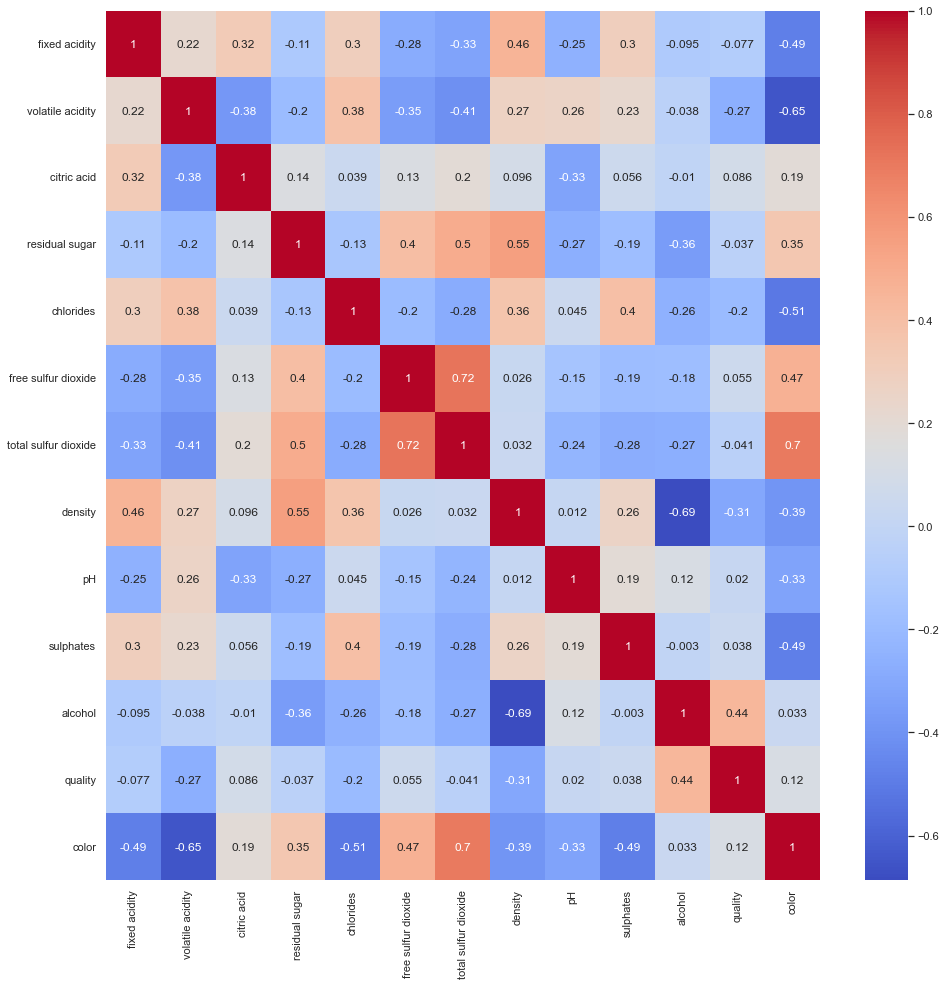

In [18]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

### Data Cleaning
#### Dropping *Quality* feature
The original dataset is clean to begin with and only contains numerical features. But I will remove the quality feature since I do not want to train using it. 

In [19]:
quality = df['quality']
df.drop(columns='quality', inplace = True)

#### Normalization
Since clustering algorithms use distance metrics, it is important to normalize. This will ensure that 1 feature with large nominal values is not overrepresented in the model. 

In [20]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

#### Handling missing values
I am replacing the missing values with the mean for the feature. 

In [21]:
df.fillna(df.mean(), inplace=True)

### Models
#### K-Means

In [29]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df_scaled['Cluster'] = np.array(clusters)
#print(df_scaled)

In [30]:
df_scaled['Quality'] = np.array(quality)

In [33]:
ari = adjusted_rand_score(df_scaled['Quality'], df_scaled['Cluster'])
nmi = normalized_mutual_info_score(df_scaled['Quality'], df_scaled['Cluster'])

print(f'Adjusted Rand Index (ARI): {ari:.3f}')
print(f'Normalized Mutual Information (NMI): {nmi:.3f}')

Adjusted Rand Index (ARI): 0.033
Normalized Mutual Information (NMI): 0.058


#### Agglomerative Clustering

In [34]:
agg_clustering = AgglomerativeClustering(n_clusters=7)
df_scaled['Cluster'] = agg_clustering.fit_predict(df_scaled.drop(columns=['Quality']))

ari = adjusted_rand_score(df_scaled['Quality'], df_scaled['Cluster'])
nmi = normalized_mutual_info_score(df_scaled['Quality'], df_scaled['Cluster'])

print(f'Adjusted Rand Index (ARI): {ari:.3f}')
print(f'Normalized Mutual Information (NMI): {nmi:.3f}')

Adjusted Rand Index (ARI): 0.032
Normalized Mutual Information (NMI): 0.058


#### Logistic Regression

In [28]:
#resetting the df
X = df_scaled.drop(columns=['Quality', 'Cluster'])

X_train, X_test, y_train, y_test = train_test_split(X, quality, test_size=0.3, random_state=42, stratify=quality)

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.5f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.52718
Confusion Matrix:
[[  0   0   4   4   0   1   0]
 [  0   1  36  27   1   0   0]
 [  0   1 346 292   2   1   0]
 [  0   0 201 598  52   0   0]
 [  0   0  16 225  83   0   0]
 [  0   0   5  35  18   0   0]
 [  0   0   0   0   1   0   0]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Conclusion
For this project I created three models. The two unsupervised models I used are K-means and Agglomerative Clustering. The metrics I used to evaluate performnace are Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI). ARI is a measure to quantify the similarity between two datasets. NMI measures the similariity between two datasets. I chose these because of their application to clustering algorithms. Unfortunatley neither of my unsupervised models had favorable results. From the summary table below, it is clear are not clustering accurately. 

| Train_Size_Fraction 	| KMeans 	| Agglomerative Clustering 	|
|--------------------:	|--------	|--------------------------	|
|                 ARI 	|  0.033 	| 0.035                   	|
|                 NMI 	|  0.058 	| 0.058                    	|



This piqued my interest, and I attempted to use a supervised model, specifically Logistic Regression. The model does perform slightly better with a accuracy of 0.527, but it is still far from ideal. I expected Logistic Regression to perform better on predicting the exact quality labels since it directly learns from the labeled data.